# Import Library

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Unlabelled data metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # SDB-CH

# Labelled data metrics
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

# Import Dataset

In [75]:
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing

In [76]:
col = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "salary"]
le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "salary"]] = mm.fit_transform(df[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "salary"]])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


# A. Supervised Learning

**A1. Support Vector Classifier**

In [77]:
X = df[['capital-gain', 'hours-per-week']]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [78]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
y_pred = svm.predict(X_test)

support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

**A2. Evaluasi Hasil Prediksi**

Confusion Matrix SVM 

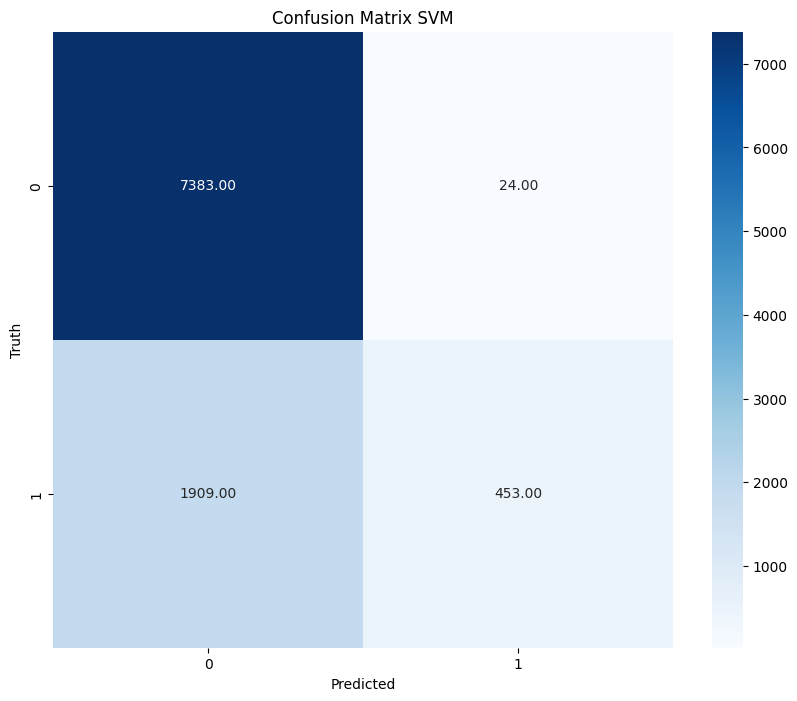

In [80]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

Classification Report SVM 

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      7407
         1.0       0.95      0.19      0.32      2362

    accuracy                           0.80      9769
   macro avg       0.87      0.59      0.60      9769
weighted avg       0.83      0.80      0.75      9769



**A3. Plotting Hasil Prediksi SVM**

c:\Users\ASUS ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


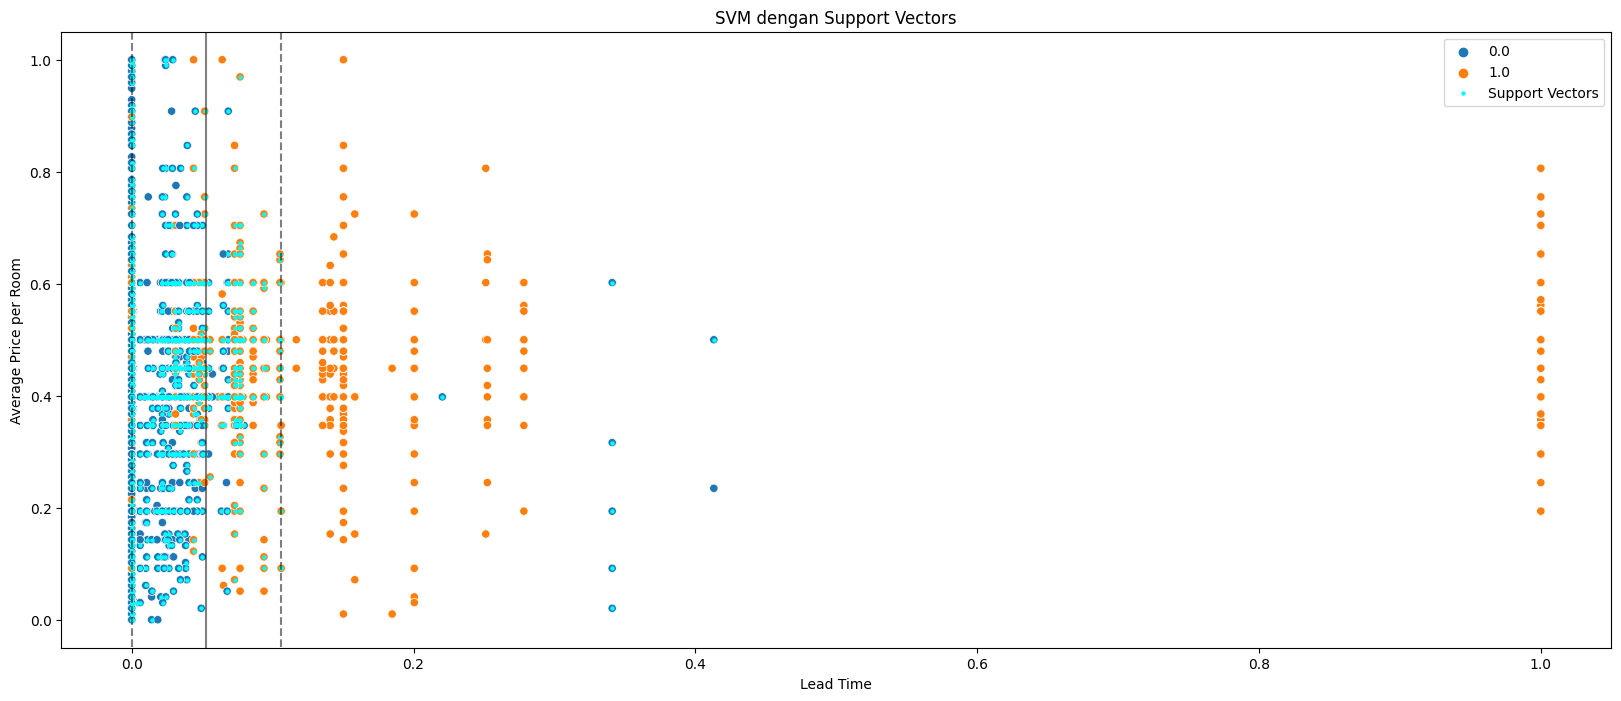

In [82]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='capital-gain', y='hours-per-week', data=df, hue='salary')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=5, color='cyan', marker='o', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Lead Time')
plt.ylabel('Average Price per Room')
plt.legend(loc='upper right')
plt.title('SVM dengan Support Vectors')
plt.show()

# B. Unsupervised Learning

**B1. K-Means Clustering**

In [83]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [84]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

**B2. Evaluasi Hasil Clusteriing**

Tanpa Label Asli

In [85]:
# Silhouette Score
ss_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, df['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.61
Davies-Bouldin Index: 0.60
Calinski-Harabasz Index: 19298.82


Dengan Label Asli

In [86]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["salary"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["salary"], df['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df['salary'], df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df["salary"], df['cluster'])
completeness = completeness_score(df["salary"], df['cluster'])
v_measure = v_measure_score(df["salary"], df['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
salary     0.0   1.0
cluster             
0        19586  7464
1         5134   377 

Adjusted Rand Index (ARI): -0.08
Normalized Mutual Information (NMI): 0.04
Homogeneity Score: 0.04
Completeness Score: 0.04
V-Measure Score: 0.04


**B3. Plotting Hasil Klasterisasi**

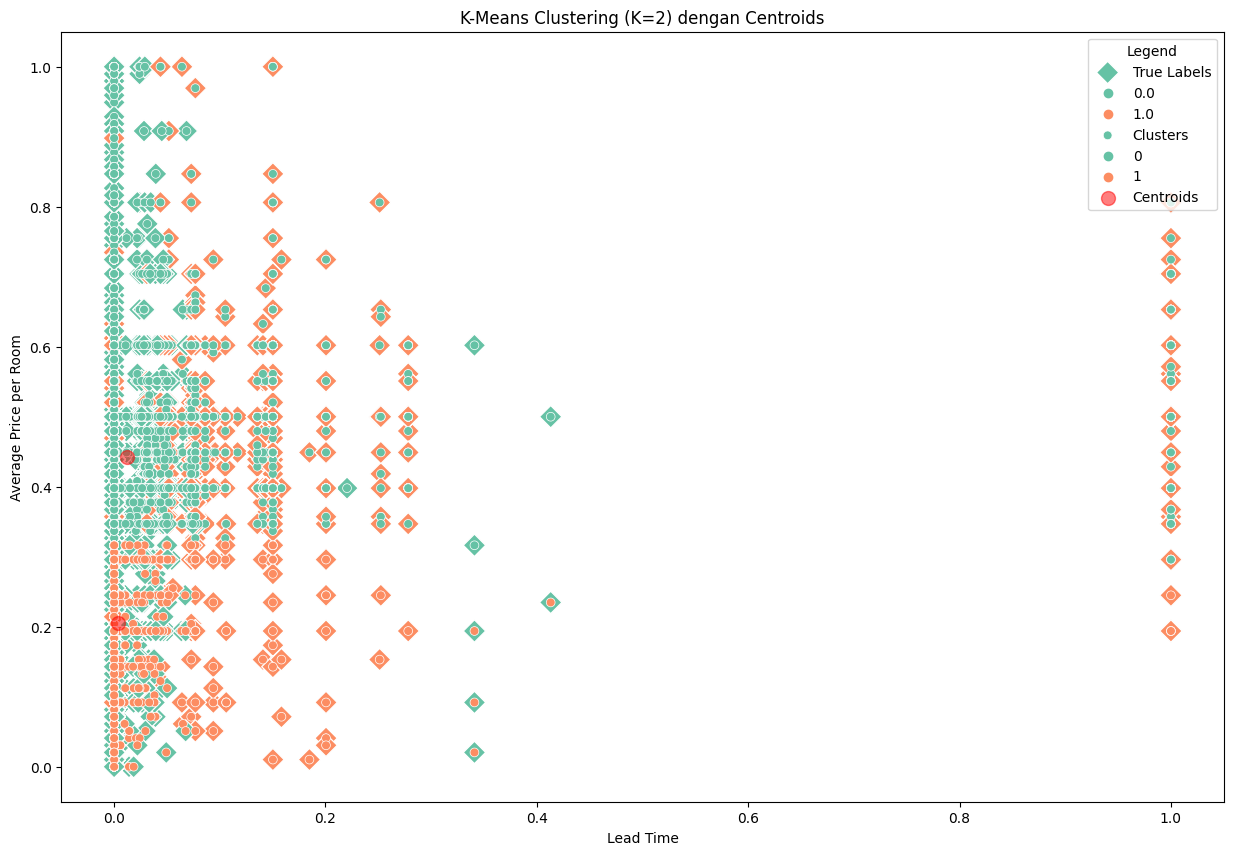

In [87]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="capital-gain", y="hours-per-week", hue="salary", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=df, x="capital-gain", y="hours-per-week", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={k}) dengan Centroids")
plt.xlabel("Lead Time")
plt.ylabel("Average Price per Room")
plt.legend(title="Legend", loc="upper right")
plt.show()